In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Définir les paramètres
image_size = (256, 256)
num_shapes = 3
classes = ['classe1', 'classe2', 'classe2']  # Classes de segmentation
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Couleurs correspondant aux classes

In [3]:
def generate_shape(image, min_area=1500):
    shape_type = random.choice(['rectangle', 'cercle'])
    color = random.choice(colors)
    
    if shape_type == 'rectangle':
        x1, y1 = random.randint(0, image.shape[1] - 50), random.randint(0, image.shape[0] - 50)
        x2, y2 = random.randint(x1 + 10, image.shape[1]), random.randint(y1 + 10, image.shape[0])
        area = (x2 - x1) * (y2 - y1)
        if area >= min_area:
            cv2.rectangle(image, (x1, y1), (x2, y2), color, -1)
        else:
            generate_shape(image, min_area)
    else:
        center = (random.randint(0, image.shape[1]), random.randint(0, image.shape[0]))
        radius = random.randint(10, 50)
        area = np.pi * radius**2
        if area >= min_area:
            cv2.circle(image, center, radius, color, -1)
        else:
            generate_shape(image, min_area)

In [4]:
# Générer une image synthétique
def generate_synthetic_image():
    image = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)  # Créer une image noire
    for _ in range(num_shapes):
        generate_shape(image)
    return image

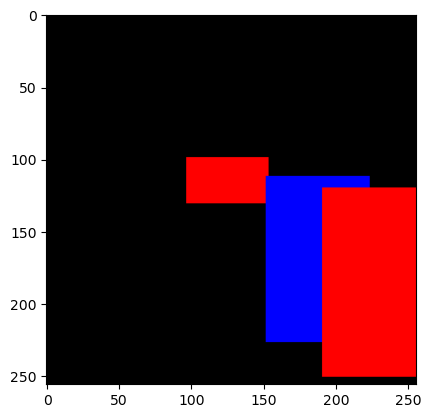

In [5]:
# Générer une image synthétique et ses masques de segmentation
synthetic_image = generate_synthetic_image()


plt.imshow(synthetic_image)

# Code complet

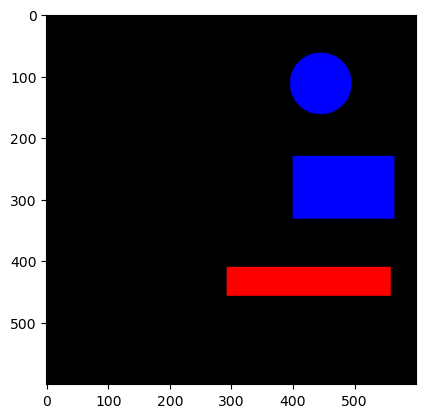

In [207]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Définir les paramètres
image_size = (600, 600)
num_shapes = 3
classes = ['classe1', 'classe2', 'classe2']  # Classes de segmentation
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Couleurs correspondant aux classes

def generate_shape(image, min_area=4000):
    shape_type = random.choice(['rectangle', 'cercle'])
    color = random.choice(colors)
    
    if shape_type == 'rectangle':
        x1, y1 = random.randint(0, image.shape[1] - 50), random.randint(0, image.shape[0] - 50)
        x2, y2 = random.randint(x1 + 10, image.shape[1]), random.randint(y1 + 10, image.shape[0])
        area = (x2 - x1) * (y2 - y1)
        if area >= min_area:
            cv2.rectangle(image, (x1, y1), (x2, y2), color, -1)
        else:
            generate_shape(image, min_area)
    else:
        center = (random.randint(0, image.shape[1]), random.randint(0, image.shape[0]))
        radius = random.randint(10, 50)
        area = np.pi * radius**2
        if area >= min_area:
            cv2.circle(image, center, radius, color, -1)
        else:
            generate_shape(image, min_area)

# Générer une image synthétique
def generate_synthetic_image():
    image = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)  # Créer une image noire
    for _ in range(num_shapes):
        generate_shape(image)
    return image

# Générer une image synthétique et ses masques de segmentation
synthetic_image = generate_synthetic_image()


plt.imshow(synthetic_image)

# Avec images

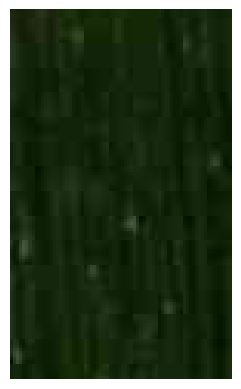

In [343]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def extract_and_display_random_patch(image_path, max_patch_size=200):
    # Charger l'image
    image = Image.open(image_path)
    
    # Convertir l'image en tableau numpy pour faciliter la manipulation
    image_array = np.array(image)

    # Générer des dimensions aléatoires pour le patch
    patch_height = np.random.randint(50, max_patch_size)  
    patch_width = np.random.randint(50, max_patch_size)  

    # Générer des coordonnées aléatoires pour extraire le patch
    x = np.random.randint(0, image_array.shape[1] - patch_width)
    y = np.random.randint(0, image_array.shape[0] - patch_height)

    # Extraire le patch de l'image
    patch = image_array[y:y+patch_height, x:x+patch_width]

    # Créer une nouvelle image à partir du patch
    patch_image = Image.fromarray(patch)

    return patch_image

# Utilisation de la fonction
image_path = "/Users/titouanlegourrierec/Desktop/sain.jpg"  # Chemin de votre image
patch_image = extract_and_display_random_patch(image_path)

    # Afficher l'image du patch
plt.imshow(patch_image)
plt.axis('off')
plt.show()

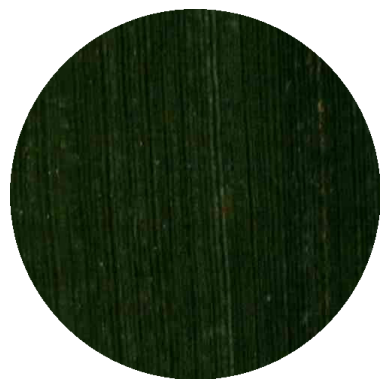

In [373]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def extract_and_display_random_circle_patch(image_path):
    # Charger l'image
    image = Image.open(image_path)

    # Taille de l'image
    width, height = image.size

    # Générer des dimensions aléatoires pour le patch (rayon du cercle)
    max_radius = min(width, height) // 2  
    radius = np.random.randint(20, max_radius)  

    # Générer des coordonnées aléatoires pour le centre du cercle
    center_x = np.random.randint(radius, width - radius)
    center_y = np.random.randint(radius, height - radius)

    # Créer une nouvelle image pour contenir le patch rond
    patch_image = Image.new('RGBA', (2 * radius, 2 * radius))

    # Copier la partie de l'image dans le cercle
    patch_image.paste(image.crop((center_x - radius, center_y - radius, center_x + radius, center_y + radius)))

    # Créer un masque circulaire pour le patch
    mask = Image.new('L', (2 * radius, 2 * radius), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, 2 * radius, 2 * radius), fill=255)

    # Appliquer le masque sur le patch
    patch_image.putalpha(mask)

    return patch_image

# Utilisation de la fonction
image_path = "/Users/titouanlegourrierec/Desktop/sain.jpg"  # Chemin de votre image
patch_image = extract_and_display_random_circle_patch(image_path)

    # Afficher le patch rond
plt.imshow(patch_image)
plt.axis('off')
plt.show()


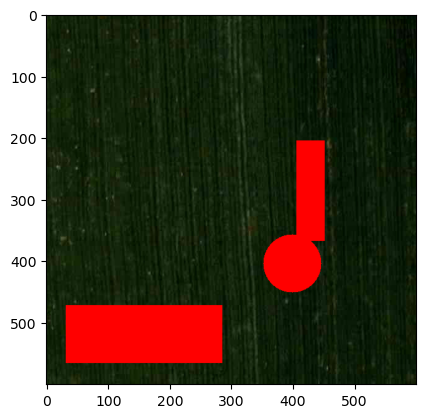

In [374]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Définir les paramètres
image_size = (600, 600)
num_shapes = 3
classes = ['classe1', 'classe2', 'classe2']  # Classes de segmentation
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Couleurs correspondant aux classes

def generate_shape(image, min_area=4000):
    shape_type = random.choice(['rectangle', 'cercle'])
    color = random.choice(colors)
    
    if shape_type == 'rectangle':
        x1, y1 = random.randint(0, image.shape[1] - 50), random.randint(0, image.shape[0] - 50)
        x2, y2 = random.randint(x1 + 10, image.shape[1]), random.randint(y1 + 10, image.shape[0])
        area = (x2 - x1) * (y2 - y1)
        if area >= min_area:
            cv2.rectangle(image, (x1, y1), (x2, y2), color, -1)
        else:
            generate_shape(image, min_area)
    else:
        center = (random.randint(0, image.shape[1]), random.randint(0, image.shape[0]))
        radius = random.randint(10, 50)
        area = np.pi * radius**2
        if area >= min_area:
            cv2.circle(image, center, radius, color, -1)
        else:
            generate_shape(image, min_area)

# Générer une image synthétique
def generate_synthetic_image(background_image):
    image = np.copy(background_image)  # Copier l'image de fond
    for _ in range(num_shapes):
        generate_shape(image)
    return image

# Charger l'image de fond
background_image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")
background_image = cv2.resize(background_image, image_size)  # Redimensionner l'image de fond

# Générer une image synthétique et ses masques de segmentation
synthetic_image = generate_synthetic_image(background_image)

# Afficher l'image synthétique
plt.imshow(cv2.cvtColor(synthetic_image, cv2.COLOR_BGR2RGB))
plt.show()

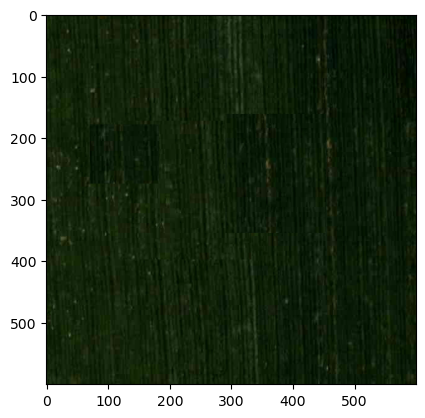

In [431]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Définir les paramètres
image_size = (600, 600)
num_shapes = 3
classes = ['classe1', 'classe2', 'classe2']  # Classes de segmentation

def generate_random_patch(image):
    # Générer des dimensions aléatoires pour le patch
    max_patch_size = min(image.shape[0], image.shape[1]) // 2  # Taille maximale du patch
    patch_height = np.random.randint(50, max_patch_size)  
    patch_width = np.random.randint(50, max_patch_size)  

    # Générer des coordonnées aléatoires pour extraire le patch
    x = np.random.randint(0, image.shape[1] - patch_width)
    y = np.random.randint(0, image.shape[0] - patch_height)

    # Extraire le patch de l'image
    patch = image[y:y+patch_height, x:x+patch_width]
    return patch

def generate_random_circle_patch(image):
    # Générer des dimensions aléatoires pour le patch (rayon du cercle)
    max_radius = min(image.shape[0], image.shape[1]) // 4  
    radius = np.random.randint(20, max_radius)  

    # Générer des coordonnées aléatoires pour le centre du cercle
    center_x = np.random.randint(radius, image.shape[1] - radius)
    center_y = np.random.randint(radius, image.shape[0] - radius)

    # Créer une nouvelle image pour contenir le patch rond
    patch_image = np.zeros((2 * radius, 2 * radius, 3), dtype=np.uint8)

    # Copier la partie de l'image dans le cercle
    patch_image = image[center_y - radius:center_y + radius, center_x - radius:center_x + radius]
    return patch_image

# Générer une image synthétique
def generate_synthetic_image(background_image):
    image = np.copy(background_image)  # Copier l'image de fond
    for _ in range(num_shapes):
        if random.random() < 0.5:
            shape_patch = generate_random_patch(image)
        else:
            shape_patch = generate_random_circle_patch(image)
        x = np.random.randint(0, image.shape[1] - shape_patch.shape[1])
        y = np.random.randint(0, image.shape[0] - shape_patch.shape[0])
        image[y:y+shape_patch.shape[0], x:x+shape_patch.shape[1]] = shape_patch
    return image

# Charger l'image de fond
background_image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")
background_image = cv2.resize(background_image, image_size)  # Redimensionner l'image de fond

# Générer une image synthétique et ses masques de segmentation
synthetic_image = generate_synthetic_image(background_image)

# Afficher l'image synthétique
plt.imshow(cv2.cvtColor(synthetic_image, cv2.COLOR_BGR2RGB))
plt.show()

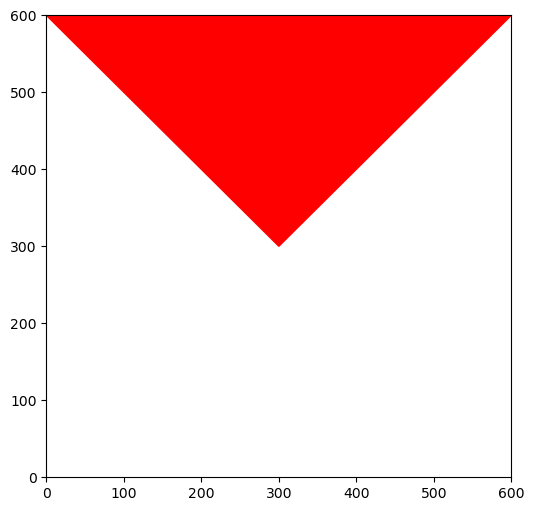

In [484]:
import matplotlib.pyplot as plt

image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")

# Créer une nouvelle figure
plt.figure(figsize=(6, 6))

# Coordonnées des sommets du triangle
x = [0, 600, 300]
y = [600, 600, 300]

# Tracer le triangle
plt.fill(x, y, color='red')

# Définir les limites des axes
plt.xlim(0, 600)
plt.ylim(0, 600)

# Afficher le plot
plt.show()

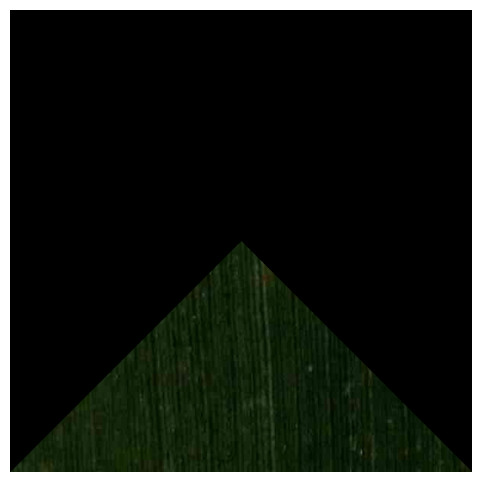

In [490]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized = cv2.resize(image, (600, 600))

# Créer une nouvelle figure
plt.figure(figsize=(6, 6))

# Coordonnées des sommets du triangle
x = [0, 600, 300]
y = [600, 600, 300]

# Créer un masque pour le triangle
triangle_mask = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask, [np.array(list(zip(x, y)))], 255)

# Appliquer l'image comme motif de remplissage pour le triangle
triangle_filled = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask)

# Afficher l'image avec le triangle rempli
plt.imshow(cv2.cvtColor(triangle_filled, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()

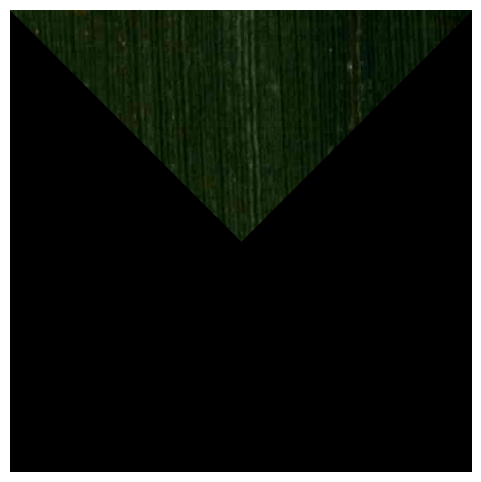

In [491]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized = cv2.resize(image, (600, 600))

# Créer une nouvelle figure
plt.figure(figsize=(6, 6))

# Coordonnées des sommets du triangle
x = [0, 300, 600]
y = [0, 300, 0]

# Créer un masque pour le triangle
triangle_mask = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask, [np.array(list(zip(x, y)))], 255)

# Appliquer l'image comme motif de remplissage pour le triangle
triangle_filled = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask)

# Afficher l'image avec le triangle rempli
plt.imshow(cv2.cvtColor(triangle_filled, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()

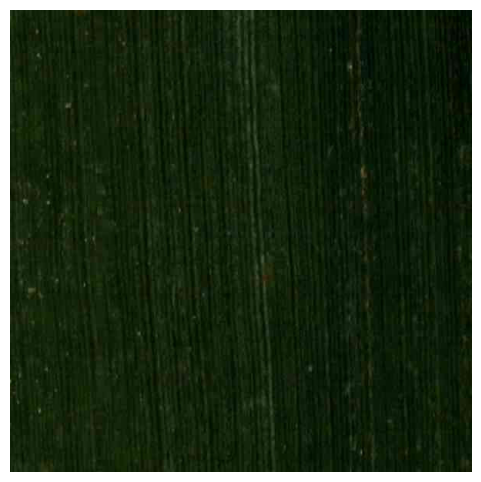

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized = cv2.resize(image, (600, 600))

# Charger l'image
image1 = cv2.imread("/Users/titouanlegourrierec/Desktop/oidium.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized1 = cv2.resize(image1, (600, 600))


#####################################################################################################################

# Créer une nouvelle figure
plt.figure(figsize=(6, 6))

# Coordonnées des sommets du premier triangle
x1 = [0, 600, 300]
y1 = [600, 600, 300]

# Créer un masque pour le premier triangle
triangle_mask1 = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask1, [np.array(list(zip(x1, y1)))], 255)

# Appliquer l'image comme motif de remplissage pour le premier triangle
triangle_filled1 = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask1)

# Coordonnées des sommets du deuxième triangle
x2 = [0, 300, 600]
y2 = [0, 300, 0]

# Créer un masque pour le deuxième triangle
triangle_mask2 = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask2, [np.array(list(zip(x2, y2)))], 255)

# Appliquer l'image comme motif de remplissage pour le deuxième triangle
triangle_filled2 = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask2)


# Coordonnées des sommets du troisième triangle
x3 = [0, 0, 300]
y3 = [0, 600, 300]

# Créer un masque pour le troisième triangle
triangle_mask3 = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask3, [np.array(list(zip(x3, y3)))], 255)

# Appliquer l'image comme motif de remplissage pour le troisième triangle
triangle_filled3 = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask3)


# Coordonnées des sommets du quatrième triangle
x4 = [600, 600, 300]
y4 = [0, 600, 300]

# Créer un masque pour le quatrième triangle
triangle_mask4 = np.zeros((600, 600), dtype=np.uint8)
cv2.fillPoly(triangle_mask4, [np.array(list(zip(x4, y4)))], 255)

# Appliquer l'image comme motif de remplissage pour le quatrième triangle
triangle_filled4 = cv2.bitwise_and(image_resized, image_resized, mask=triangle_mask4)

# Ajouter les triangles remplis ensemble
combined_image = cv2.bitwise_or(triangle_filled1, triangle_filled2)
combined_image = cv2.bitwise_or(combined_image, triangle_filled3)
combined_image = cv2.bitwise_or(combined_image, triangle_filled4)

# Afficher l'image avec les triangles remplis
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()


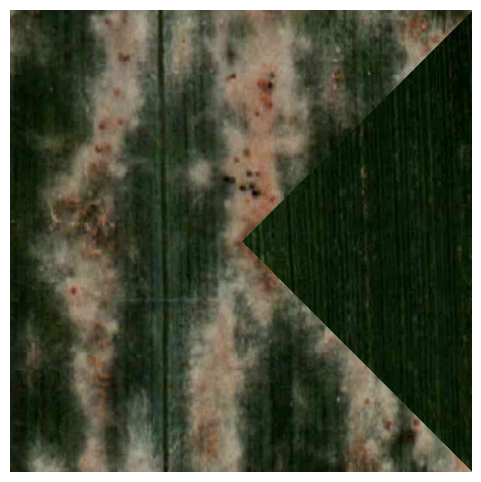

In [150]:
# Charger l'image
image = cv2.imread("/Users/titouanlegourrierec/Desktop/sain.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized = cv2.resize(image, (600, 600))

# Charger l'image
image1 = cv2.imread("/Users/titouanlegourrierec/Desktop/oidium.jpg")

# Redimensionner l'image pour qu'elle ait la même taille que le plot
image_resized1 = cv2.resize(image1, (600, 600))

#####################################################################################################################

# Créer une nouvelle figure
plt.figure(figsize=(6, 6))

# Coordonnées des sommets du premier triangle
x1 = [0, 600, 300]
y1 = [600, 600, 300]

# Aplatir les images pour les rendre 1D avant de les passer à np.random.choice()
flattened_images = [image_resized.flatten(), image_resized1.flatten()]

# Choix aléatoire de l'indice de l'image à utiliser pour remplir le premier triangle
selected_image_index = np.random.choice(len(flattened_images))
selected_image = flattened_images[selected_image_index].reshape(600, 600, 3)
triangle_filled1 = cv2.bitwise_and(selected_image, selected_image, mask=triangle_mask1)

# Coordonnées des sommets du deuxième triangle
x2 = [0, 300, 600]
y2 = [0, 300, 0]

# Choix aléatoire de l'indice de l'image à utiliser pour remplir le deuxième triangle
selected_image_index = np.random.choice(len(flattened_images))
selected_image = flattened_images[selected_image_index].reshape(600, 600, 3)
triangle_filled2 = cv2.bitwise_and(selected_image, selected_image, mask=triangle_mask2)

# Coordonnées des sommets du troisième triangle
x3 = [0, 0, 300]
y3 = [0, 600, 300]

# Choix aléatoire de l'indice de l'image à utiliser pour remplir le troisième triangle
selected_image_index = np.random.choice(len(flattened_images))
selected_image = flattened_images[selected_image_index].reshape(600, 600, 3)
triangle_filled3 = cv2.bitwise_and(selected_image, selected_image, mask=triangle_mask3)

# Coordonnées des sommets du quatrième triangle
x4 = [600, 600, 300]
y4 = [0, 600, 300]

# Choix aléatoire de l'indice de l'image à utiliser pour remplir le quatrième triangle
selected_image_index = np.random.choice(len(flattened_images))
selected_image = flattened_images[selected_image_index].reshape(600, 600, 3)
triangle_filled4 = cv2.bitwise_and(selected_image, selected_image, mask=triangle_mask4)

# Ajouter les triangles remplis ensemble
combined_image = cv2.bitwise_or(triangle_filled1, triangle_filled2)
combined_image = cv2.bitwise_or(combined_image, triangle_filled3)
combined_image = cv2.bitwise_or(combined_image, triangle_filled4)

# Afficher l'image avec les triangles remplis
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()

